----------------------------------------------------------------------------------------------------
Processing: Equation 1: 3x^5 - 6x^2 + 11x - 6
Initial guesses: x0 = -1, x1 = 0.5
Root found: 0.80318 (Secant Method) in 3 iterations.


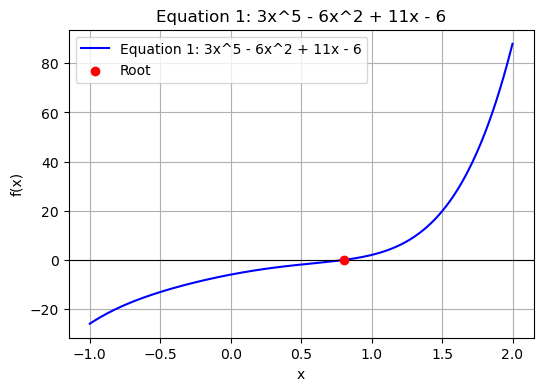


                                                                                                    
----------------------------------------------------------------------------------------------------
Processing: Equation 2: e^x + 3x^3
Initial guesses: x0 = -1, x1 = 0.0
Root found: -0.57221 (Secant Method) in 6 iterations.


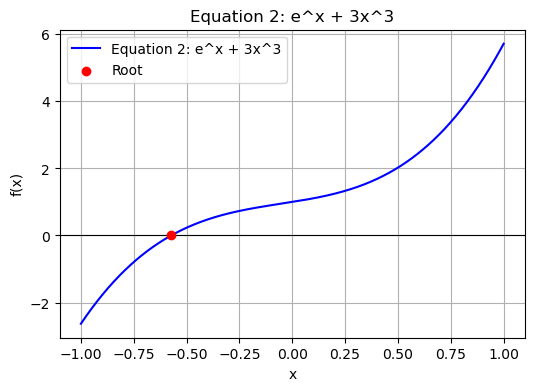


                                                                                                    
----------------------------------------------------------------------------------------------------
Processing: Equation 3: sin(x) + e^x - 3x
Initial guesses: x0 = -2, x1 = 0.0
Root found: 0.90245 (Secant Method) in 16 iterations.


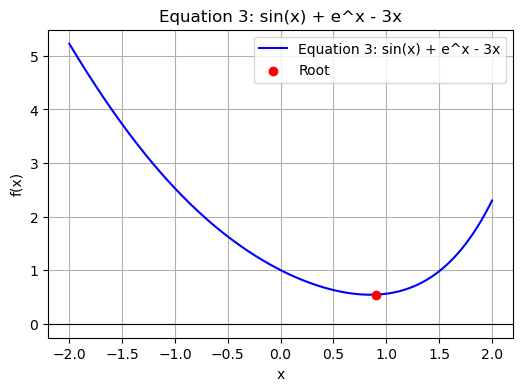


                                                                                                    
----------------------------------------------------------------------------------------------------
Processing: Equation 4: (4x - 3x^4)/e^sin(x)
Initial guesses: x0 = -1, x1 = 0.5
Root found: 0.00083 (Secant Method) in 7 iterations.


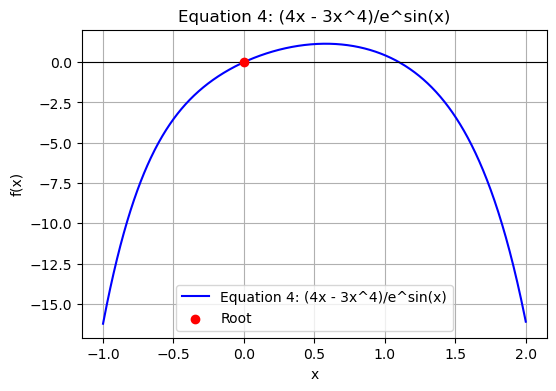


                                                                                                    
----------------------------------------------------------------------------------------------------
Processing: Equation 5: (2 + cos(x))/(3e^sin(x))
Initial guesses: x0 = -1, x1 = 0.0
No real root found using Secant Method. Possible reasons:
 - The function may have complex (imaginary) roots.
 - The method did not converge due to poor initial guesses.
 - The function might not have a root in the given interval.


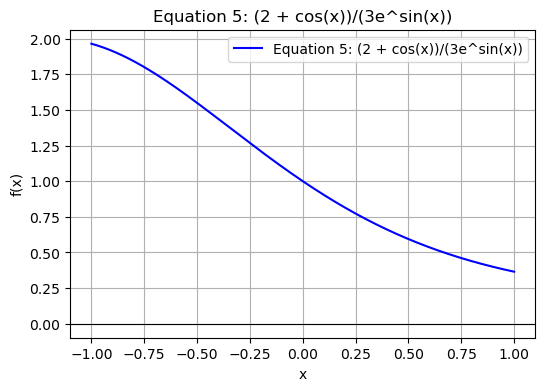

In [1]:
#secant method

import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 3*x**5 - 6*x**2 + 11*x - 6

def f2(x):
    return np.exp(x) + 3*x**3

def f3(x):
    return np.sin(x) + np.exp(x) - 3*x

def f4(x):
    return (4*x - 3*x**4) / np.exp(np.sin(x))

def f5(x):
    return (2 + np.cos(x)) / (3 * np.exp(np.sin(x)))

def secant_method(f, x0, x1, tol=0.05, max_iter=50):
    prev_x, curr_x = x0, x1

    for i in range(max_iter):
        fx0, fx1 = f(prev_x), f(curr_x)
        
        if fx1 - fx0 == 0:
            return None 
        
        x_new = curr_x - fx1 * (curr_x - prev_x) / (fx1 - fx0)
        
        if abs(x_new - curr_x) < tol:
            return x_new, i+1
        
        prev_x, curr_x = curr_x, x_new
    
    return None 

def plot_function(f, a, b, title, root=None):
    x = np.linspace(a, b, 1000)
    y = f(x)
    
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=title, color='blue')
    plt.axhline(0, color='black', linewidth=0.8)
    
    if root is not None:
        plt.scatter(root, f(root), color='red', zorder=5, label="Root")
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

functions = [
    (f1, -1, 2, "Equation 1: 3x^5 - 6x^2 + 11x - 6"),
    (f2, -1, 1, "Equation 2: e^x + 3x^3"),
    (f3, -2, 2, "Equation 3: sin(x) + e^x - 3x"),
    (f4, -1, 2, "Equation 4: (4x - 3x^4)/e^sin(x)"),
    (f5, -1, 1, "Equation 5: (2 + cos(x))/(3e^sin(x))")
]

for f, a, b, title in functions:
    x0, x1 = a, (a + b) / 2  
    root_secant = secant_method(f, x0, x1)
    
    print("-" * 100)
    print(f"Processing: {title}")
    print(f"Initial guesses: x0 = {x0}, x1 = {x1}")
    
    if root_secant:
        root, iterations = root_secant
        print(f"Root found: {root:.5f} (Secant Method) in {iterations} iterations.")
        plot_function(f, a, b, title, root=root)
    else:
        print(f"No real root found using Secant Method. Possible reasons:")
        print(" - The function may have complex (imaginary) roots.")
        print(" - The method did not converge due to poor initial guesses.")
        print(" - The function might not have a root in the given interval.")
        plot_function(f, a, b, title)
    
    print("\n" + " " * 100) 